# Recurrent Neural Networks (Redes Neuronales Recurrentes).
Las RNN se usan para datos secuenciales. Abandonamos el "visual technology".

* Nos reducimos en el dominio. Ya no son imagenes sino secuencias. Tensores de rango menor. Por ejemplo palabras, sonidos, etc.

* Podemos predecir, y de eso se trata. los LLM:Large Language models tambien caen aca.

Yann Lecunn dice que es dificil predecir un video. Por ejemplo usted tiene una camara girando en un cuarto. Es dificil predecir que marco sigue (un mueble, una persona, un florero)? Yo digo que es imposible predecir un video por que exiten mas 7000 mil millones de personas en el mundo y multiplique objetos. De otro lado el lenguaje es discreto.

Tiene muchas utilidades:
* NLP: Natural Language Processing
* Prediccion de la proxima palabra, o frase.

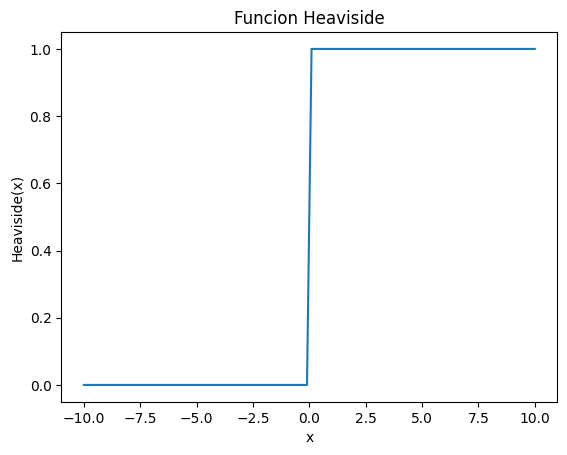

In [1]:
# quiero graficar la funcion Heaviside
import numpy as np
import matplotlib.pyplot as plt

# defina la funcion
def heaviside(x):
    return np.where(x >= 0, 1, 0)

# grafique la funcion
x = np.linspace(-10, 10, 100)
y = heaviside(x)

# grafique
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Heaviside(x)')
plt.title('Funcion Heaviside')
plt.show()

* Se pueden predecir audios.

## Historia:
* En los 1980s Jurgen Schimdbuber y su equipo las inventaron
* A John Hopfield y David Rumelhard (1982)  se les atribuye los RNN.


## Introduccion.
[Luis Serrano](https://www.youtube.com/watch?v=UNmqTiOnRfg) muestra una motivacion acerca de como funcionan las RNN.
Yo me inspire en este video y lo que sigue es la misma tecnica con variaciones.

Piense en un viajero (vendedor) que va entre tres ciudades
* A: Armenia
* B: Bogota
* C: Cali

Queremos disenhar un sistema que prediga cual es la proxima ciudad que se va a visitar. En ese orden. Si estoy en A sigue B, si estoy en B sigue C y si estoy en C sigue A.

Inicialmente creamos one-hot-encoding vectors.

$$A
\mapsto \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix} \quad , \quad
B \mapsto \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} \quad , \quad
C \mapsto \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}
  $$

La siguiente matriz hace el trabajo y lo verificamos.

$$ M =
\begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0  \\
0 & 1 & 0
\end{pmatrix}
$$







Verifiquemos

$$MA =
\begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix}
= \begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix} = B
$$

$$MB =
\begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix}
= \begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix} = C
$$

$$MC =
\begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix}
= \begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix} = A
$$

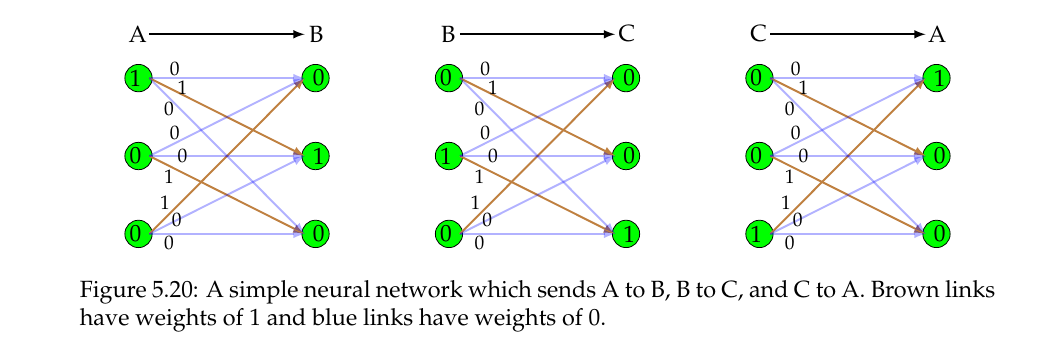

Generalizamos un poco mas con la siguiente grafica.

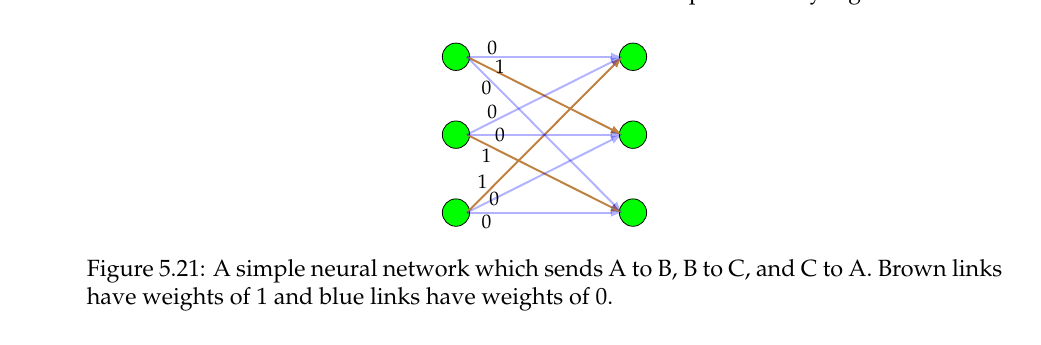

Que tal si queremos formar secuencias del tipo
ABCABCABCABC....
Aca es donde llega la recursividad. Es decir el ultimo lo manda al primero.

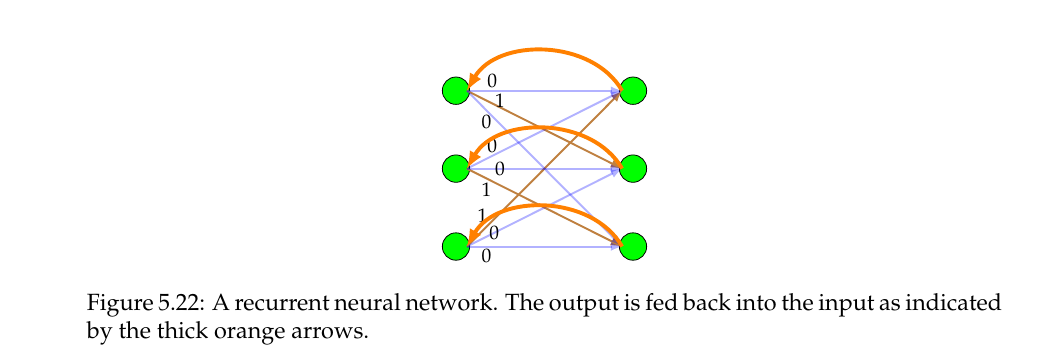

Complicamos el problema un poco mas. Asumimos que el viajero puede quedarse a dormir una noche en cualquiera de las ciudades.
Tenemos que definir nuevos parametros. (one-hot-encoded)

$$ \text{stay} \mapsto \binom{1}{0} $$
$$ \text{leave} \mapsto \binom{0}{1} $$

Para resolver este problema, mas complicado, redefinimos la matriz $M$

$$
M =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1  \\
-- & -- & -- \\
0 & 0 & 1 \\
1 & 0 & 0  \\
0 & 1 & 0
\end{pmatrix}
$$
Me es una matriz compuesta donde la parte superior es la $I_{3 \times 3}$ y la inferior es la $M$ de la parte anterior.

Asumamos que estamos en el estado $C$ (en Cali).

$$
MC = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1  \\
-- & -- & -- \\
0 & 0 & 1 \\
1 & 0 & 0  \\
0 & 1 & 0
\end{pmatrix}
\begin{pmatrix} 1  \\ 0 \\ 0 \end{pmatrix}
=
\begin{pmatrix}
0 \\ 0 \\ 1 \\ -- \\ 1 \\ 0 \\ 0
\end{pmatrix}
= \binom{C}{A}
\implies \binom{\text{stay}}{\text{leave}}
$$



Introducimos una matriz nueva stay-leave


$$\text{stay-leave} =
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
-- & -- \\
0 & 1 \\
0 & 1 \\
0 & 1
\end{pmatrix} $$

Veamos como opera esta matriz con los dos estados stay-leave

$$
(\text{stay-leave}) ( \text{stay})
=
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
-- & -- \\
0 & 1 \\
0 & 1 \\
0 & 1
\end{pmatrix}
\binom{1}{0}
=
\begin{pmatrix}
1 \\ 1 \\ 1  \\ -- \\ 0 \\ 0 \\ 0
\end{pmatrix}
$$


$$
(\text{stay-leave}) ( \text{leave})
=
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
-- & -- \\
0 & 1 \\
0 & 1 \\
0 & 1
\end{pmatrix}
\binom{0}{1}
=
\begin{pmatrix}
0 \\ 0 \\ 0  \\ -- \\ 1 \\ 1 \\ 1
\end{pmatrix}
$$

La descripcion del algoritmo es como sigue


Vamos a asumir que estamos en la ciudad $C$
y que nos vamos a quedar ahi (stay).
* Calculamos la salida de $MC$ y el producto (stay-leave)(stay)

$$
MC = \begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1  \\
-- & -- & -- \\
0 & 0 & 1 \\
1 & 0 & 0  \\
0 & 1 & 0
\end{pmatrix}
\begin{pmatrix} 1  \\ 0 \\ 0 \end{pmatrix}
=
\begin{pmatrix}
0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 0
\end{pmatrix}
\quad, \quad
(\text{stay-leave}) ( \text{stay})
=
\begin{pmatrix}
1 & 0 \\
1 & 0 \\
1 & 0 \\
-- & -- \\
0 & 1 \\
0 & 1 \\
0 & 1
\end{pmatrix}
\binom{1}{0}
=
\begin{pmatrix}
1 \\ 1 \\ 1  \\ -- \\ 0 \\ 0 \\ 0
\end{pmatrix}
$$


* Sumamos los dos resultados

$$
MC + (\text{stay-leave})(\text{stay})
=
\begin{pmatrix}
0 \\ 0 \\ 1 \\ 1 \\ 0 \\ 0
\end{pmatrix} +
\begin{pmatrix}
1 \\ 1 \\ 1 \\ 0 \\ 0 \\ 0
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 1 \\ 2 \\ 1 \\ 0 \\ 0
\end{pmatrix}
$$


* Aplicamos un filtro no lineal que asigma 1 al maximo de todas las componentes del vector suma (ultimo) y 0 a las demas
El resultado es


$$
\begin{pmatrix}
0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0
\end{pmatrix}
$$

* El ultimo paso es multiplicar este vector por la matriz $Q$

$$
Q =
\begin{pmatrix}
1 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \\
\end{pmatrix}
$$

Veamos que esta matriz termina el trabajo.

$$
\begin{pmatrix}
1 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
0 \\ 0 \\ 1 \\ 0 \\ 0 \\ 0
\end{pmatrix} =
\begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix}
= C
$$
Con esto vamos dibuamos la red neuronal que resuelve este problema.






La explicacion la doy oral.

Queremos que esto se haga en un ciclo.

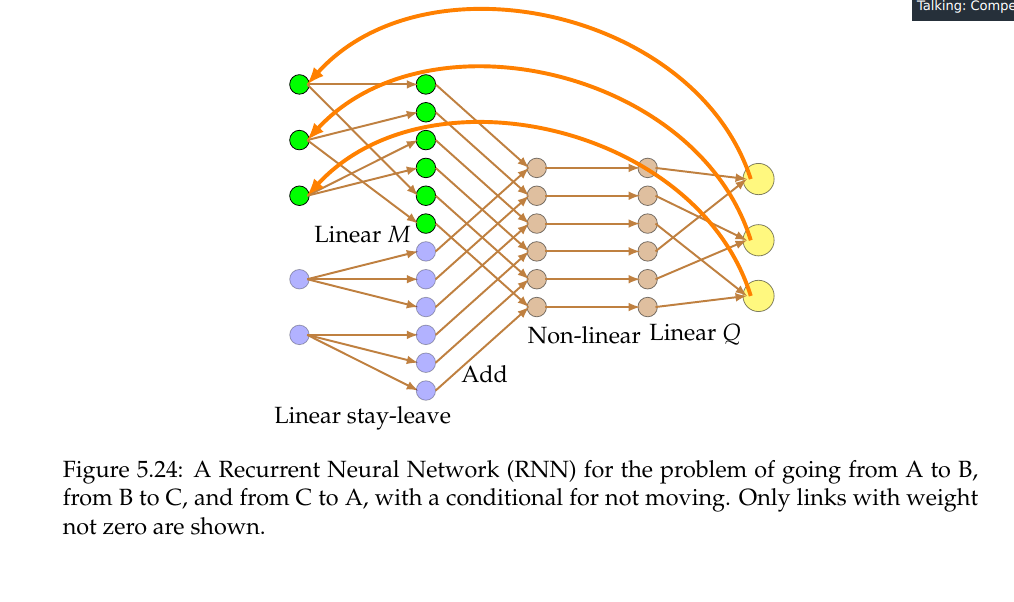

# RNN:
Las RNN son redes neuronales recursivas. Es decir tienen retroalimentacion de forma que la salida se retroalimenta.
Veamos un ejemplo. La Figura 5.25 es una red neuronal recursiva que le dice "vanilla" (vainalla).



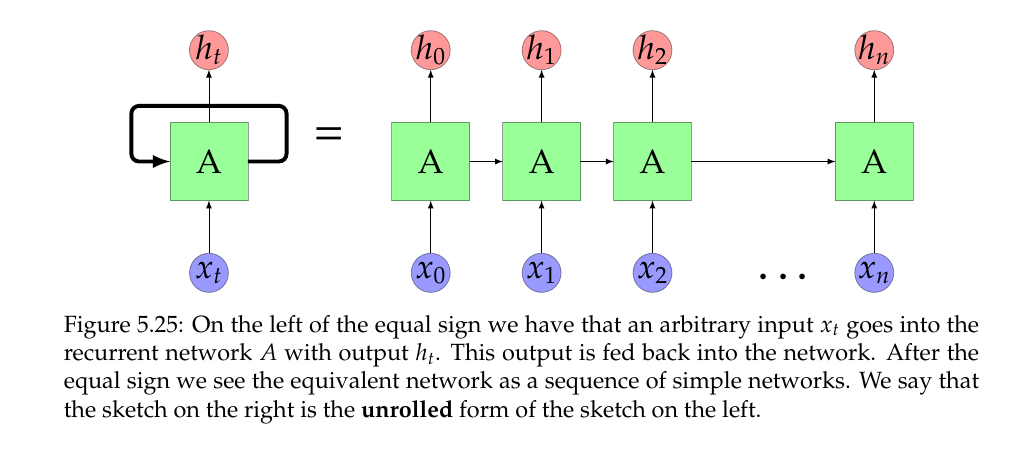

Esta red neuronal en la Figura 5.25, tiene datos de entrada $x_i$, $i=0,1, \cdots, n$. La salida en cada caso es $h_i$, $i=0,1, \cdots, n$. Vamos a usar el indice $t$ para indicar que es en tiempo. Son dinamicas.

Matematicamente definimos la recursion como

$$h_t = f_\Theta( h_{t-1}, x_t) $$

Un pseudocodigo de esto seria

```
h = 0
for i in range(n):
    x_i = input_data_i \\
    h = f(np.dot(Theta_x, x_i) +np.dot(Theta_h, h_i)
```

Vamos a ver algunas arquitecturas de RNNs.

* La arquitectura de la Figura 5.25 es **many-to-many**.

* La Figura 5.26 muestra el caso de una entrada y una salida **one-to-one**.

* **many-to-many** con varias capas de salida. Figura 5.27.

* **one-to-many** Una entrada con varias salidas. La descripcion de una figura. Una entrada pero se describen varios elementos en la figura.

* **many-to-one**: Por ejemplo un cuestionario de "si" y "no".


i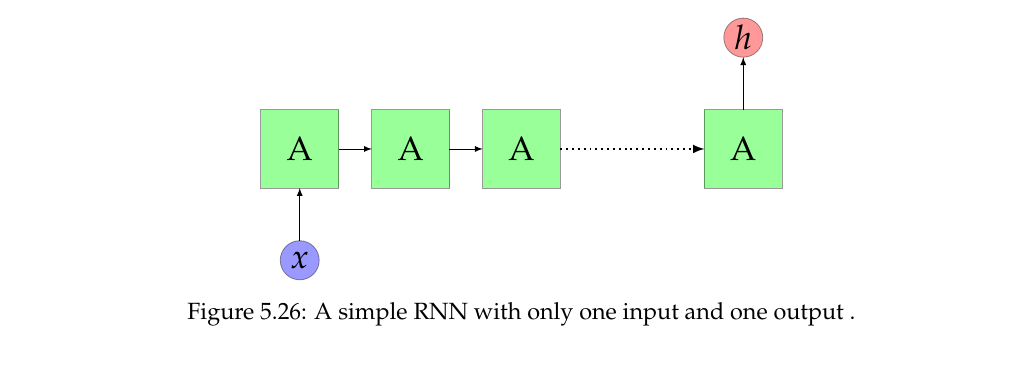

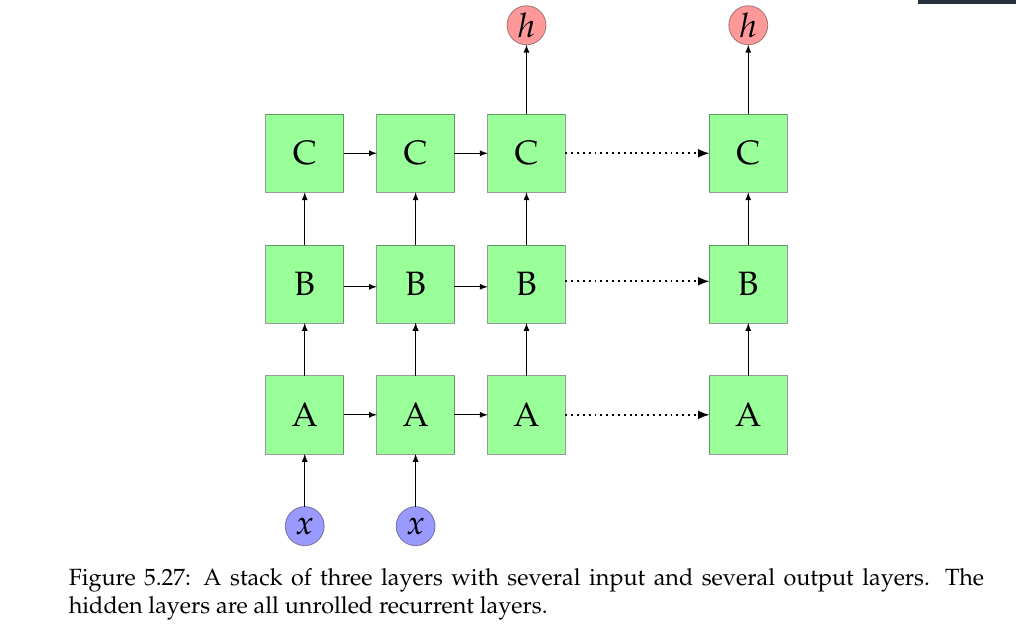

# El gradiente de las RNN.
A esto en ingles lo llaman BPTT.

El analisis siguiente se basa en la
[pagina](https://d2l.ai/chapter_recurrent-neural-networks/bptt.html)


La funcion de costo global la llamanos $C$ y se puede escribir como

$$C = \frac1T \sum_{t=1}^T C_t $$
donde $C_t$ es el gradiente local.
El analisis se hace sobre la grafica.




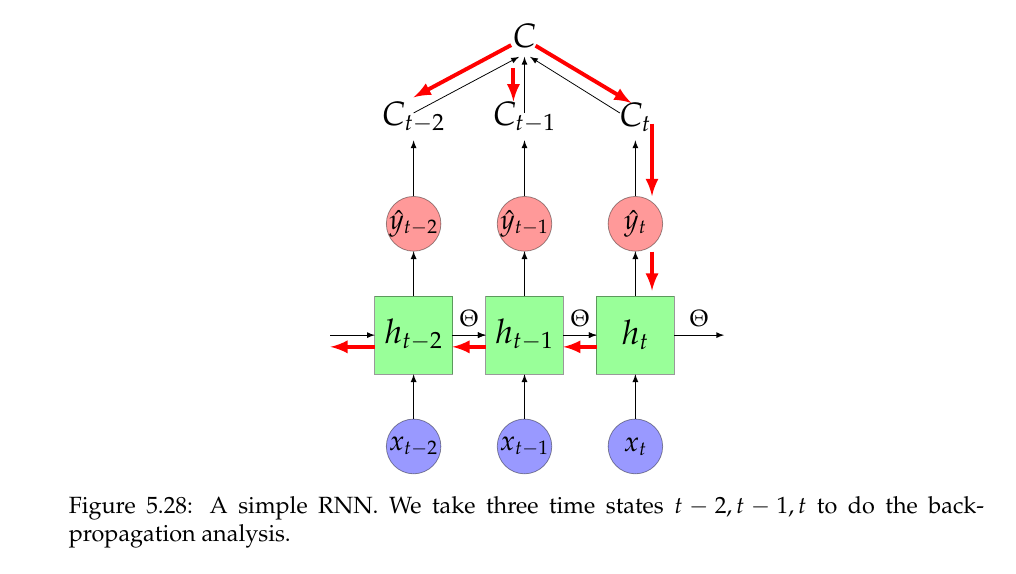

Una caracteristicas importante de estas redes que $\Theta$ es constante hasta una nueva epoca.
Las ecuaciones para comenzar

$$h_t = f(x_t, h_{t-1}, \theta_x, \theta_h) \tag{1} $$
$$\hat{y}_t = g(h_t, \theta_y) $$

Lo que queremos es evaluar


$$\frac{\partial C_k}{\partial \theta_h} $$

Usando la regla de la cadena pasando por $\hat{y}_t$, $h_t$ y por $\theta_h$.

$$\frac{\partial C_k}{\partial \theta_h} = \frac{\partial C_k}{\partial \hat{y}_t} \frac{\partial \hat{y}_k}{\partial h_t}
\frac{\partial h_t}{\partial \theta_h} $$

Las dos primeras derivadas son analiticas (funcion de costo y la activacion) la ultima es mas compleja, veamos esta

$$\frac{\partial h_t}{\partial \theta_h} = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h}
+   \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h}{\partial h_{t-1}}  \frac{\partial h_{t-1}}{\partial \theta_h} $$

Esta formula representa la siguiente recursion

$$a_t = b_t + c_t a_{t-1} $$
donde
$$a_t = \frac{\partial h_t}{\partial \theta_h}
\quad, \quad b_t = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_t)}{\partial \theta_h}
\quad , \quad  c_t = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial h_{t-1}}$$





Asumamos que $a_0=0$.
\begin{eqnarray}
a_1 &=& b_1  \\
a_2 &=& b_2 + c_2 a_1 = b_2 + c_2 b_1 \\
a_3 &=& b_3 + c_3 a_2 = b_3 + c_3 (b_2 + c_2 b_1) = b_3 + c_3 b_2 + c_3 c_2 b_1 \\
a_4 &=& b_4 + c_4 a_3 = b_4 + c_4 (b_3 + c_3 b_2 + c_3 c_2 b_1) = b_4 + c_4 b_3 + c_4 c_3 b_2 + c_4 c_3 c_2 b_1 \\
&\vdots&  \\
a_t &=& b_t + \sum_{i=1}^{t-1} b_i \prod_{j=i+1}^t c_j
\end{eqnarray}

Con esto podemos decir que





$$\frac{\partial h_t}{\partial \theta_h} = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h}
+   \sum_{i=1}^{t-1} \frac{\partial f(x_i, h_{i-1}, \theta_x, \theta_h)}{\partial h_{t-1}} \prod_{j=i+1}^t  \frac{\partial f(x_j, h_{j-1}, \theta_x, \theta_h)}{\partial h_{j-1}} \tag{2} $$

Verifiquemos que por lo menos el comienzo esta bien.o
Asuma $a_0=0$, $t=1$,  de la Ecuacion (1).

$$h_1 = f(x_1, h_{0}, \theta_x, \theta_h)  $$

$$\frac{\partial h_1}{\partial \theta_h} = \frac{\partial f(x_1, h_0, \theta_x, \theta_h}{\partial \theta_h} $$

De la ecuacion (2) vemos que el resultado es el mismo, por que la sumatoria no alcanza a ejecutarse.

En la Ecuacion (1) se ve que $h_t$ tambien es funcion de $\theta_x$. Sin embargo aca no hay recursividad.

Veamos el gradiente con respecto a $\theta_x$

$$ \frac{\partial C_k}{\partial \theta_x} =
\frac{\partial C_k}{\partial \hat{y}_t} \frac{\partial \hat{y}_t}{\partial h_t} \frac{\partial h_t}{\partial \theta_x}. $$

Las dos primeras derivadas parciales son analiticas (la funcion de costo y la activacion $g$). De todas formas hagamos la segunda.

$$\frac{\partial \hat{y}_t}{\partial h_t}= \frac{g}{\partial h_t} $$
El argumento de $g$ es el producto de la matriz $\theta_y=U$ por el vector  $h_t$. Es decir

$$z = U h_t $$

Tomando derviada parcial $\partial z/\partial h_t=U$

O sea que

$$\frac{\partial g}{\partial h_t} = \frac{\partial g}{\partial z} U $$

De otro lado escribimos

$$f(x_t, h_{t-1}, W, \Theta) = f(W x_t + \Theta h_{t-1}) $$

$\theta_x = W$, $\theta_h = \Theta$.

Necesitamos calcular

$$\frac{\partial f(x_t, h_{t-1}, W, \Theta)}{\partial \theta_h} $$

vamos primero con respecto a $W=\theta_x$. Asumimos que $f$ es un vector y toamos la componente $f_r$

Necesitamos

$$\frac{\partial f_r}{\partial W} = \frac{\partial f_r}{\partial \xi_j} \frac{\partial \xi_j}{\partial W}  \tag{3} $$

Donde, usando Einstein notation.
$$\xi = W x_t + \Theta h_{t-1}, \xi_j = W_{jk}(x_t)_k + \Theta_{jk} ( h_{t-1})_k $$

Calculemos el segundo factor

$$\frac{\partial \xi_j}{\partial W_{pq}} = \delta_{jp} \delta_{kq} (x_t)_k = \delta_{jp} (x_t)_q  $$
reemplazmos en (3)

$$\frac{\partial f_r}{\partial W_{pq}} = \frac{\partial f_r}{\partial \xi_j} \delta_{jp}(x_t)_q = \frac{\partial f_r}{\partial \xi_p} (x_t)_q $$

De igual (forma) (copiar/pegar editar)

$$ \frac{\partial f_r}{\partial \Theta_{pq}} = \frac{\partial f_r}{\partial \xi_p}(h_{t-1})_q $$


En la ecuacion (2) nos queda faltando el factor en al productoria.


$$\frac{\partial f(x_j, h_{j-1}, \theta_x, \theta_h)}{\partial h_{j-1}} $$

$$\xi = W x_t + \Theta h_{t-1} $$
$$\xi_j = (W x_t)_j + (\Theta h_{t-1})_j = W_{jk}(x_t)_k + \Theta_{jk} (h_{t-1})_k $$
Tomemos la compnente $r$ de $f$ como $f_r$

$$\frac{\partial f_r}{\partial (h_{t-1})_s}=
\frac{\partial f_r}{\partial \xi_p} \frac{\partial \xi_p}{\partial (h_{j-1})_s} = \frac{\partial f_r}{\partial \xi_p} \delta_{ks} \Theta_{pk} = \frac{\partial f_r}{\partial \xi_p}
\Theta_{ps}$$

De forma vectorial podemos escribir

$$\frac{\partial f_r}{\partial h_{j-1}} = \frac{\partial f_r}{\partial \xi} \Theta \tag{4} $$

Si volvemos a la Ecuacion (2) vemos que este termino esta en una productoria. Es decir que la matriz $\Theta$ (no cambia en la productoria) se eleva a la $t$.

Es decir
$$\Theta^t \tag{5}$$.
Que pasa si el radio espectral de $\Theta$ es $\rho(\Theta) >1$.
Entonces la potencia (5) diverge al infinito (crece sin limites) y esto origina el **exploding gradient problem**
Otra posibilida es que $\rho(\Theta) < 1$ en este caso el producto se acerca a cero y general el **vanishing gradient problem**.


Realmente las cosas no son exactamente asi. Hay dos pequenhos errores.

1. La matriz $\Theta$ no necesariamente es cuadrada. O sea que $\Theta^t$, $t \ge 2$ no tiene sentido.

2. Relamente la ecuacion (4) es un producto y las matrices no necesariamente conmutan. Entonces no podemos separar los $\Theta$ de el otro factor.


Sin embargo la idea persiste, hay una matriz $\Theta$ que se esta multiplicando muchas veces.

Entonces el problema que tienen las RNN es el problema del vanishing or exploding gradiente. Es decir $t$ no puede ser muy grande entones las redes no pueden puden ser muy profundas.


Soluciones para este problema.

1. Gradient clipping: Cuando el gradiente tiende a crecer se puede recortar una vez pase de un umbral.  De otra forma el codigo te puede generar NaN.

2. Regularizacion. Usar normalizacion $\ell_1$, $\ell_2$ o dropout.

3. Funciones de activacion. No usar el sigmoid o tanh.

4. Regularizacion de los pesos usando normals $\ell_1, \ell_2$

5. Disenho de Inicializacion. En las notas de clase refiero al articulo de Xavier Glorot y Yoshua Bengio. La normalizacion clasica busca que los pesos tengan media 0 y desviacion estandard 1. El metodo de Xavier Initializacion (Glorot Initializacion) busca que la desviacion estandard cumple el siguiente critierio

$$
\frac12 ( n_{in} + n_{out}) \sigma^2 =
\begin{cases}
> 1 \quad , \text{exploding gradiente } \\
= 1 \quad, \text{estable} \\
<1 \quad , \text{vanishing gradient}
\end{cases}
$$
Lo que se busca es estabilidad. O sea que se busca una desviacion estandard de


$$\sigma = \sqrt{ \frac{2}{n_{in} + n_{out}}}$$

El resultado lo ilustran en una grafica.




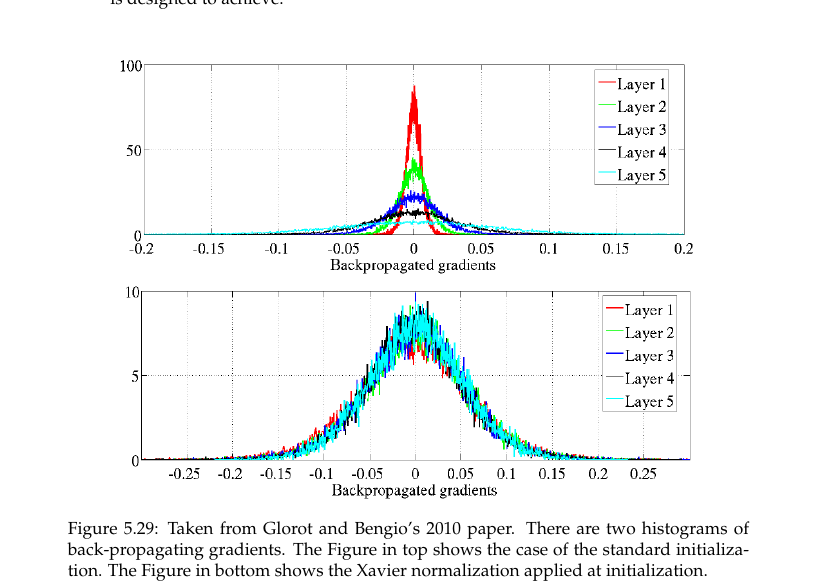

6. Redes LSTM (Long Short Term Memory) (proxima clase)

7. Tranformer.

# Proxima clase LSTM y GRU